# Classifier Models

Now that the text data has been prepared and preprocessed, I would now build a classifier algorithm/model to classify the predictions of different genders(Male, female and brand). Since there are 3 labels of classes, this is a multiclass classification. I use the Tweets(non_cleaned_version) of the file to predict the gender from the text.

Usually, Classification is the process of predicting the class of given data points. Classes are sometimes called as targets/ labels or categories. Classification predictive modeling is the task of approximating a mapping function (f) from input variables (X) to discrete output variables (y). 

Now let me load the data and prepare it to train and feed it to the model. Let's start.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
## Importing the required csv files saved previously from our feature and target files

X = pd.read_csv('../Springboard-Capstone-2/tweets.csv')

In [3]:
y = pd.read_csv('../Springboard-Capstone-2/target.csv')

In [4]:
# split the dataset in train and test

from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12, stratify=y)

In [5]:
print(X_train.shape)
print(X_test.shape)
print(len(y_train))
print(len(y_test))

(9662, 1000)
(4142, 1000)
9662
4142


## 1. Logistic Regression Classifier

Let us now try using a Logistic Regression Classifier model. Logistic regression is a classification algorithm used to assign observations to a discrete set of classes. It is a special case of linear regression where the target variable is categorical in nature. The hypothesis of logistic regression tends it to limit the cost function between 0 and 1.

Here I set the parameter grid for selecting the best parameters using GridSearchCV for my RandomForestRegressor. It also contains cross validation within the Gridsearch on the dataset. This method is called hyperparameter tuning, where optimization is the key factor for selecting the best parameters.

In [6]:
%%time

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

sc = StandardScaler()
logistic = LogisticRegression()
pipe = Pipeline(steps=[('sc', sc),
                       ('logistic', logistic)])


C = [0.01, 0.1, 1, 10, 100]
# Create a list of options for the regularization penalty
penalty = ['l1', 'l2']

# Create a dictionary of all the parameter options. We can access the parameters of steps of a pipeline by using '__'

parameters = dict(logistic__C=C, logistic__penalty=penalty)

# Conduct Parameter Optmization With Pipeline
# Create a grid search object
cv = GridSearchCV(pipe, parameters, cv=5)

cv.fit(X_train, y_train)

Wall time: 57min 9s


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('sc',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('logistic',
                                        LogisticRegression(C=1.0,
                                                           class_weight=None,
                                                           dual=False,
                                                           fit_intercept=True,
                                                           intercept_scaling=1,
                                                           l1_ratio=None,
                                                           max_iter=100,
                                                           multi_class='war

In [7]:
cv.best_params_

{'logistic__C': 0.1, 'logistic__penalty': 'l1'}

In [8]:
lr = LogisticRegression(penalty = 'l1', C= 0.1, random_state = 12)

In [9]:
lr.fit(X_train, y_train)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=12, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [10]:
# Predicting the test sets

y_pred = lr.predict(X_test)
print('Accuracy:',accuracy_score(y_test,y_pred))
print('Confusion matrix:\n',confusion_matrix(y_test,y_pred))
print('Classification report:\n',classification_report(y_test,y_pred))

Accuracy: 0.6055045871559633
Confusion matrix:
 [[ 800  259   77]
 [ 152 1287  171]
 [ 162  813  421]]
Classification report:
               precision    recall  f1-score   support

           0       0.72      0.70      0.71      1136
           1       0.55      0.80      0.65      1610
           2       0.63      0.30      0.41      1396

    accuracy                           0.61      4142
   macro avg       0.63      0.60      0.59      4142
weighted avg       0.62      0.61      0.58      4142



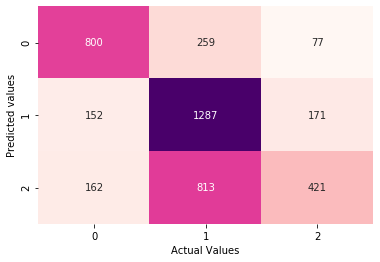

In [11]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test,y_pred)

sns.heatmap(conf_mat,annot=True,cmap="RdPu",fmt=".0f",cbar=False)
plt.xlabel('Actual Values')
plt.ylabel('Predicted values')
plt.show()

From the above, let me elaborate on what the metrics really are.

**Confusion Matrix**: It is a performance measurement for machine learning classification problem where output can be two or more classes. It is a table with different combinations of predicted and actual values. It helps us understand the True Positive, False positives, True Negatives and False Negatives.

**Precision**: Out of all the positive classes we have predicted correctly, how many are actually positive. It is a ratio of TP/TP+FP.

**Recall**: Out of all the positive classes, how much we predicted correctly. It should be high as possible. It is a ratio of TP/TP+FN.

## 2. RandomForest Classifier

I prefer to use Random Forest ensemble method which is a non linear model. In this, I use a Classifier, since my output contains multiple classes to determine. It uses multiple decision trees and a technique called as bagging. This combines multiple decision trees in determining the final output rather than relying on individual decision trees. So let me dive into how things work below.

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import GridSearchCV

# split the dataset in train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [13]:
%%time

rfr = RandomForestClassifier(random_state=42)
param_grid = { 
    'n_estimators': [50, 100, 200],
    'max_depth' : [5, 10, 15],
    'bootstrap': [True]
}

#Using GridSearchCV for optimal hyperparameters and noting how much time it takes to train the model

cv = GridSearchCV(estimator=rfr, param_grid=param_grid, cv= 5)
cv.fit(X_train, y_train)

Wall time: 2min 4s


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=42,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'

In [14]:
cv.best_params_

{'bootstrap': True, 'max_depth': 15, 'n_estimators': 50}

In [15]:
#Using RFR with the best parameters obtained from GridSearchCV
rfc1=RandomForestClassifier(n_estimators= 50, max_depth=15, bootstrap=True, random_state=42)

# Training the RFR model
rfc1.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=15, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [16]:
y_pred = rfc1.predict(X_test)
print('Accuracy:',accuracy_score(y_test,y_pred))
print('Confusion matrix:\n',confusion_matrix(y_test,y_pred))
print('Classification report:\n',classification_report(y_test,y_pred))

Accuracy: 0.5743602124577499
Confusion matrix:
 [[ 669  424   43]
 [  74 1471   65]
 [ 122 1035  239]]
Classification report:
               precision    recall  f1-score   support

           0       0.77      0.59      0.67      1136
           1       0.50      0.91      0.65      1610
           2       0.69      0.17      0.27      1396

    accuracy                           0.57      4142
   macro avg       0.65      0.56      0.53      4142
weighted avg       0.64      0.57      0.53      4142



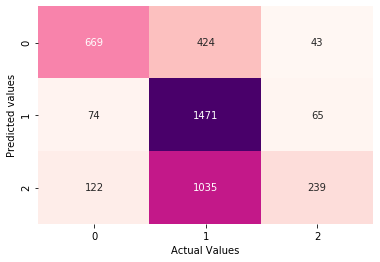

In [17]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test,y_pred)

sns.heatmap(conf_mat,annot=True,cmap="RdPu",fmt=".0f",cbar=False)
plt.xlabel('Actual Values')
plt.ylabel('Predicted values')
plt.show()

## 3. SVM

This is a C-Support Vector Classification. SVM's are mainly used for the below points. 

* SVM maximizes margin, so the model is slightly more robust (compared to linear regression), but more importantly: SVM supports kernels, so it can be modelled using non linear points too.

* These are effective in high dimensional spaces.

* Still effective in cases where number of dimensions is greater than the number of samples.

* Uses a subset of training points in the decision function (called support vectors), so it is also memory efficient.

Let us now incorporate in our dataset and see how well it performs.

In [18]:
# split the dataset in train and test

from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12, stratify=y)

In [22]:
%%time

from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

sc = StandardScaler()
svm = SVC()
pipe = Pipeline(steps=[('sc', sc),
                       ('SVM', svm)])

C = [0.01, 0.1, 1, 10]
gamma = ['scale', 'auto']

parameters = dict(SVM__C=C, SVM__gamma=gamma)

# Conduct Parameter Optmization With Pipeline
# Create a grid search object
cv = GridSearchCV(pipe, parameters, cv=5)

cv.fit(X_train, y_train)

Wall time: 1h 42min


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('sc',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('SVM',
                                        SVC(C=1.0, cache_size=200,
                                            class_weight=None, coef0=0.0,
                                            decision_function_shape='ovr',
                                            degree=3, gamma='auto_deprecated',
                                            kernel='rbf', max_iter=-1,
                                            probability=False,
                                            random_state=None, shrinking=True,
                                            tol=0.001, verbose=False))],
                    

In [23]:
cv.best_params_

{'SVM__C': 1, 'SVM__gamma': 'scale'}

In [24]:
#Using SVM with the best parameters obtained from GridSearchCV
svm_cv=SVC(C=1,gamma='scale', kernel='linear')

# Training the SVM model
svm_cv.fit(X_train, y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [25]:
y_pred = svm_cv.predict(X_test)
print('Accuracy:',accuracy_score(y_test,y_pred))
print('Confusion matrix:\n',confusion_matrix(y_test,y_pred))
print('Classification report:\n',classification_report(y_test,y_pred))

Accuracy: 0.6149203283437953
Confusion matrix:
 [[ 848  158  130]
 [ 169 1082  359]
 [ 178  601  617]]
Classification report:
               precision    recall  f1-score   support

           0       0.71      0.75      0.73      1136
           1       0.59      0.67      0.63      1610
           2       0.56      0.44      0.49      1396

    accuracy                           0.61      4142
   macro avg       0.62      0.62      0.62      4142
weighted avg       0.61      0.61      0.61      4142



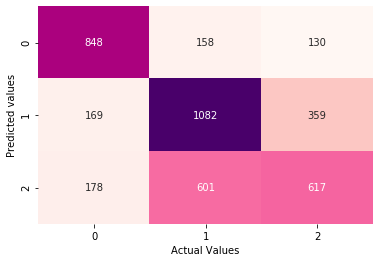

In [26]:
conf_mat = confusion_matrix(y_test,y_pred)

sns.heatmap(conf_mat,annot=True,cmap="RdPu",fmt=".0f",cbar=False)
plt.xlabel('Actual Values')
plt.ylabel('Predicted values')
plt.show()